# 9	Korrelationsanalyse


### 9.1	Drift von Widerständen

a) Die Daten werden als Scatter-Plot dargestellt. Dazu müssen sie zunächst in ein entsprechendes Format gebracht werden.

Es ergibt sich das folgende Streudiagramm.






In [1]:
""" Bibliotheken importieren"""
from scipy.io import  loadmat
from scipy.stats import norm   # normal-Verteilung
from scipy.stats import t     # t-Verteitung
from scipy.stats.stats import pearsonr
import numpy as np
import math
import F # indem die Funktionen der Korrelationsanalyse geschrieben wurden
import matplotlib.pyplot as plt
%matplotlib inline  

'''Daten laden, Variablenname Zugfestigkeit'''
values=loadmat('Widerstandsdrift')['values']

y=np.transpose(values[1:,1:]).reshape (values[1:,1:].size)

xhelp = np.meshgrid(values[0,1:],np.ones(len(values)-1))
x=np.transpose(xhelp[0]).reshape(xhelp[0].size)


Text(0.5, 1.0, 'Streudiagramm')

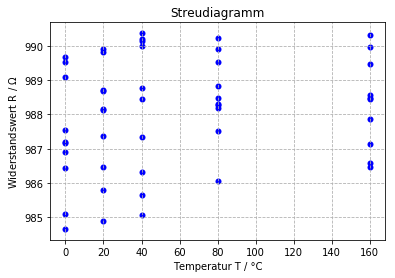

In [2]:
'''Grafische Darstellung der Messwerte'''

plt.scatter(x,y, color='b', linewidths=0.01)
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Temperatur T / °C')
plt.ylabel('Widerstandswert R / $\Omega$')
plt.title('Streudiagramm')

b) Der Korrelationskoeffizient wird direkt mit der numpy-Funktion corrcoef berechnet. Es ergibt sich ein 
Korrelationskoeffizient r = 0.1945. 




c) Zur Berechnung des Konfidenzbereich wird die standardnormalverteilte Zufallsvariable z verwendet.

$z = \left( {{{\tanh }^{ - 1}}\left( r \right) - {{\tanh }^{ - 1}}\left( \rho  \right)} \right) \cdot \sqrt {N - 3} $



Der Konfidenzbereich der Korrelation der Grundgesamtheit $\rho$ ergibt sich aus der Gleichung

$\tanh \left( {{{\tanh }^{ - 1}}\left( r \right) - \frac{{{c_2}}}{{\sqrt {N - 3} }}} \right) < \rho  \le \tanh \left( {{{\tanh }^{ - 1}}\left( r \right) - \frac{{{c_1}}}{{\sqrt {N - 3} }}} \right)$



${c_1} = {F^{ - 1}}\left( {\frac{{1 - \gamma }}{2}} \right) =  - {\rm{1}}{\rm{.9600}}$

und

${c_2} = {F^{ - 1}}\left( {\frac{{1 + \gamma }}{2}} \right) = {\rm{1}}{\rm{.9600}}$



Damit lautet der Konfidenzbereich des Korrelationskoeffizienten 

$ - 0.0886 < \rho  \le {\rm{0}}{\rm{.4486}}$




d) Zur Signifikanzbewertung des Korrelationskoeffizienten wird ein Hypothesentest durchgeführt. Die Zufallsvariable

$t = r \cdot \sqrt {\frac{{N - 2}}{{1 - {r^2}}}} $

besitzt N - 2 Freiheitsgrade. Ist die Korrelation $\rho$ = 0, weist die Zufallsvariable t den Wert null auf. Zur Berechnung der Annahmegrenzen werden die Konstanten c$_1$ und c$_2$ berechnet. Sie ergeben sich dabei aus der inversen t-Verteilung mit N - 2 Freiheitsgraden zu

${c_1} = {F^{ - 1}}\left( {\frac{{1 - \gamma }}{2}} \right) = {F^{ - 1}}\left( {\frac{\alpha }{2}} \right) =  - {\rm{2}}{\rm{.0106}}$


und 

${c_2} = {F^{ - 1}}\left( {\frac{{1 + \gamma }}{2}} \right) = {F^{ - 1}}\left( {1 - \frac{\alpha }{2}} \right) = {\rm{2}}{\rm{.0106}}$

Die Stichprobe liegt mit dem Wert 


${t_0} = r \cdot \sqrt {\frac{{N - 2}}{{1 - {r^2}}}}  = 1.3739$


Eine Python-Funktion "corranalysa_2d(X,Y,Alpha=0.05)" wurde für diese Berechnungen geschrieben und im Pythom_Datei F.py gespeichert. "Alpha" ist der Signifikanzniveau und ist gleich 0.05 als Default.


In [3]:
''' Korrelationskoeffizient r der Stichprobe
95%-Konfidenzbereich des Korrelationskoeffizienten der Grundgesamtheit '''

r,pvalue,rmin,rmax,c1t,c2t,t0=F.corranalysa_2d(x,y)

'r',r,'pvalue',pvalue,'rmin',rmin,'rmax',rmax,'c1t',c1t,'c2t',c2t,'t0',t0

('r',
 0.19453026546104107,
 'pvalue',
 0.17582627086563557,
 'rmin',
 -0.0886157341493774,
 'rmax',
 0.44858825103037325,
 'c1t',
 -2.010634754696446,
 'c2t',
 2.0106347546964454,
 't0',
 1.373993271528924)